In [1]:
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout,Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import cv2
from sklearn.model_selection import train_test_split
import pickle
import os
import pandas as pd  
import random
from keras.preprocessing.image import ImageDataGenerator
import joblib
plt.style.use('dark_background')

## Importing the Images

In [2]:
count =0
images = []
classNo = []
myList = os.listdir("DatasetsUsed/myData/")
print("Total Classes Detected: ",len(myList))
noOfClasses = len(myList)
print("Importing the Classes")
for x in range (0,len(myList)):
    myPiList = os.listdir("DatasetsUsed/myData/"+str(count))
    for y in myPiList:
        curImage = cv2.imread("DatasetsUsed/myData/"+str(count)+"/"+y)
        images.append(curImage)
        classNo.append(count)
    print(count,end = " ")
    count+=1
print("Done Importing")
images = np.array(images)
classNo = np.array(classNo)

Total Classes Detected:  43
Importing the Classes
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 Done Importing


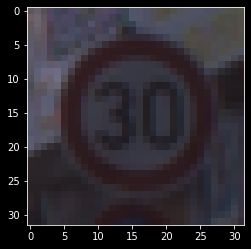

In [3]:
plt.imshow(images[200])

## Train Test Spilit Data

In [4]:
X_train, X_test, y_train, y_test = train_test_split(images,classNo,test_size=0.2) 
X_train, X_valid, y_train, y_valid = train_test_split(X_train,y_train,test_size=0.2)

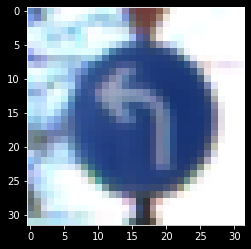

In [5]:
plt.imshow(X_train[200])

In [6]:
print("Train X Shape",X_train.shape)
print("Train y Shape",y_train.shape)
print("Test X Shape",X_test.shape)
print("Test y Shape",y_test.shape)
print("Validation X Shape",X_valid.shape)
print("Validation y Shape",y_valid.shape)

Train X Shape (22271, 32, 32, 3)
Train y Shape (22271,)
Test X Shape (6960, 32, 32, 3)
Test y Shape (6960,)
Validation X Shape (5568, 32, 32, 3)
Validation y Shape (5568,)


In [7]:
print("Data Shapes")
print("Train",end = "");print(X_train.shape,y_train.shape)
print("Validation",end = "");print(X_valid.shape,y_valid.shape)
print("Test",end = "");print(X_test.shape,y_test.shape)
assert(X_train.shape[0]==y_train.shape[0])
assert(X_valid.shape[0]==y_valid.shape[0])
assert(X_test.shape[0]==y_test.shape[0])
assert(X_train.shape[1:]==(32,32,3))
assert(X_valid.shape[1:]==(32,32,3))
assert(X_test.shape[1:]==(32,32,3))

Data Shapes
Train(22271, 32, 32, 3) (22271,)
Validation(5568, 32, 32, 3) (5568,)
Test(6960, 32, 32, 3) (6960,)


In [8]:
data = pd.read_csv("DatasetsUsed/labels.csv")
data

,ClassId,Name
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


In [9]:
print("Data Shape ",data.shape,type(data))

Data Shape  (43, 2) <class 'pandas.core.frame.DataFrame'>


## Checking Data Ananlysis

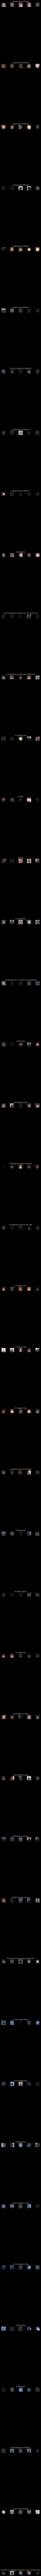

In [10]:
no_of_samples = []
cols =5
num_classes = noOfClasses
fig, axs = plt.subplots(nrows=num_classes,ncols=cols,figsize=(5, 300))
fig.tight_layout()
for i in range(cols):
    for j,row in data.iterrows():
        x_sel = X_train[y_train==j]
        axs[j][i].imshow(x_sel[random.randint(0,len(x_sel)-1),:,:],cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i==2:
            axs[j][i].set_title(str(j)+"-"+row["Name"])
            no_of_samples.append(len(x_sel))
            

[113, 1288, 1270, 791, 1117, 1056, 223, 807, 810, 874, 1133, 762, 1192, 1245, 432, 328, 231, 641, 682, 115, 190, 159, 219, 309, 151, 869, 352, 131, 303, 160, 250, 456, 139, 378, 215, 693, 222, 127, 1205, 171, 191, 130, 141]


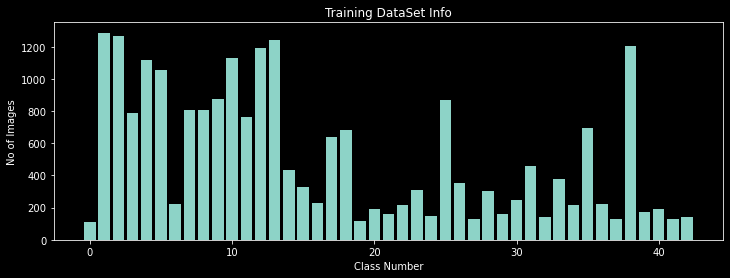

In [11]:
print(no_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0,num_classes),no_of_samples)
plt.title("Training DataSet Info")
plt.xlabel("Class Number")
plt.ylabel("No of Images")
plt.show()

In [1]:
def greyscale(img):
    img = img.astype('uint8')
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    return img

In [2]:
def equalize(img):
    img = cv2.equalizeHist(img)
    return img

In [3]:
def prepocess(img):
    img = greyscale(img)
    img = equalize(img)
    img = img/255
    return img

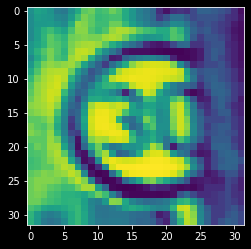

In [15]:
X_train = np.array(list(map(prepocess,X_train)))
X_test = np.array(list(map(prepocess,X_test)))
X_valid = np.array(list(map(prepocess,X_valid)))
plt.imshow(X_train[random.randint(0,len(X_train)-1)])

In [16]:
# Adding Depth of 1
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
X_valid=X_valid.reshape(X_valid.shape[0],X_valid.shape[1],X_valid.shape[2],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)

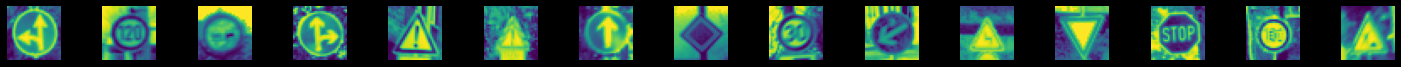

In [17]:
fig,axs=plt.subplots(1,15,figsize=(20,5))
fig.tight_layout()
for i in range(15):
    axs[i].imshow(X_train[i].reshape(32,32))
    axs[i].axis('off')
plt.show()

In [18]:
dataGen= ImageDataGenerator(width_shift_range=0.1,   # 0.1 = 10%     IF MORE THAN 1 E.G 10 THEN IT REFFERS TO NO. OF  PIXELS EG 10 PIXELS
                            height_shift_range=0.1,
                            zoom_range=0.2,  # 0.2 MEANS CAN GO FROM 0.8 TO 1.2
                            shear_range=0.1,  # MAGNITUDE OF SHEAR ANGLE
                            rotation_range=10)  # DEGREES
dataGen.fit(X_train)
batches= dataGen.flow(X_train,y_train,batch_size=20)  # REQUESTING DATA GENRATOR TO GENERATE IMAGES  BATCH SIZE = NO. OF IMAGES CREAED EACH TIME ITS CALLED
X_batch,y_batch = next(batches)

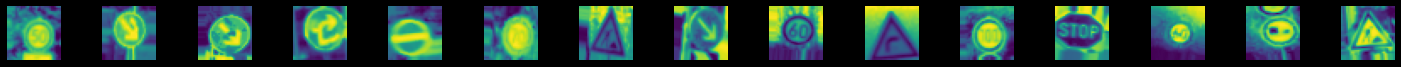

In [19]:
fig,axs=plt.subplots(1,15,figsize=(20,5))
fig.tight_layout()
for i in range(15):
    axs[i].imshow(X_batch[i].reshape(32,32))
    axs[i].axis('off')
plt.show()

In [20]:
y_train = to_categorical(y_train,noOfClasses)
y_test = to_categorical(y_test,noOfClasses)
y_valid = to_categorical(y_valid,noOfClasses)

In [21]:
def myModel():
    model = Sequential([
        Conv2D(60,(5,5),input_shape=(32,32,1),activation='relu'),
        Conv2D(60,(5,5),activation='relu'),
        MaxPooling2D(pool_size=(2,2)),
        
        Conv2D(60//2,(3,3),activation='relu'),
        Conv2D(60//2,(3,3),activation='relu'),
        MaxPooling2D(pool_size=(2,2)),
        Dropout(0.5),
        
        Flatten(),
        Dense(500,activation='relu'),
        Dropout(0.5),
        Dense(noOfClasses,activation='softmax')
    ])
    
    model.compile(Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy']
                 )
    return model

In [22]:
model  = myModel()
print(model.summary())
training_set = dataGen.flow(X_train,y_train,batch_size=50)
history=model.fit(training_set,steps_per_epoch=int(2000/50),epochs=30,validation_data=(X_valid,y_valid),shuffle=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 60)        1560      
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 60)        90060     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 60)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 30)        16230     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 30)          8130      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 30)         0         
 2D)                                                    

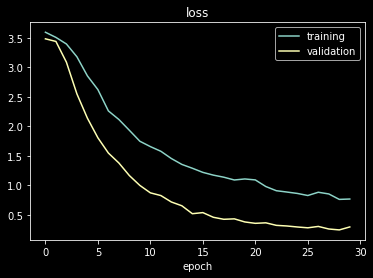

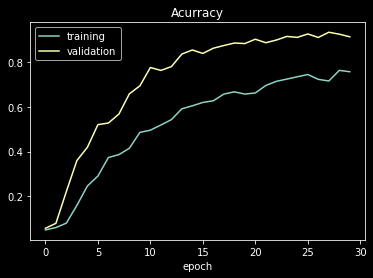

Test Score: 0.2790943682193756
Test Accuracy: 0.9204022884368896


In [23]:
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('loss')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Acurracy')
plt.xlabel('epoch')
plt.show()
score =model.evaluate(X_test,y_test,verbose=0)
print('Test Score:',score[0])
print('Test Accuracy:',score[1])

In [27]:
model.save('my_model.h5')

# TESTING the MODEL For Real Life Data

In [4]:
import tensorflow as tf
import cv2
import numpy as np

In [5]:
#!pip install joblib

In [6]:
#!pip install pyyaml h5py

In [7]:
frameWidth= 640
frameHeight = 480
brightness = 180
threshold = 0.75
font = cv2.FONT_HERSHEY_SIMPLEX

In [8]:
new_model = tf.keras.models.load_model('my_model.h5')

In [9]:
def getCalssName(classNo):
    if classNo == 0: return 'Speed Limit 20 km/h'
    elif classNo == 1: return 'Speed Limit 30 km/h'
    elif classNo == 2: return 'Speed Limit 50 km/h'
    elif classNo == 3: return 'Speed Limit 60 km/h'
    elif classNo == 4: return 'Speed Limit 70 km/h'
    elif classNo == 5: return 'Speed Limit 80 km/h'
    elif classNo == 6: return 'End of Speed Limit 80 km/h'
    elif classNo == 7: return 'Speed Limit 100 km/h'
    elif classNo == 8: return 'Speed Limit 120 km/h'
    elif classNo == 9: return 'No passing'
    elif classNo == 10: return 'No passing for vechiles over 3.5 metric tons'
    elif classNo == 11: return 'Right-of-way at the next intersection'
    elif classNo == 12: return 'Priority road'
    elif classNo == 13: return 'Yield'
    elif classNo == 14: return 'Stop'
    elif classNo == 15: return 'No vechiles'
    elif classNo == 16: return 'Vechiles over 3.5 metric tons prohibited'
    elif classNo == 17: return 'No entry'
    elif classNo == 18: return 'General caution'
    elif classNo == 19: return 'Dangerous curve to the left'
    elif classNo == 20: return 'Dangerous curve to the right'
    elif classNo == 21: return 'Double curve'
    elif classNo == 22: return 'Bumpy road'
    elif classNo == 23: return 'Slippery road'
    elif classNo == 24: return 'Road narrows on the right'
    elif classNo == 25: return 'Road work'
    elif classNo == 26: return 'Traffic signals'
    elif classNo == 27: return 'Pedestrians'
    elif classNo == 28: return 'Children crossing'
    elif classNo == 29: return 'Bicycles crossing'
    elif classNo == 30: return 'Beware of ice/snow'
    elif classNo == 31: return 'Wild animals crossing'
    elif classNo == 32: return 'End of all speed and passing limits'
    elif classNo == 33: return 'Turn right ahead'
    elif classNo == 34: return 'Turn left ahead'
    elif classNo == 35: return 'Ahead only'
    elif classNo == 36: return 'Go straight or right'
    elif classNo == 37: return 'Go straight or left'
    elif classNo == 38: return 'Keep right'
    elif classNo == 39: return 'Keep left'
    elif classNo == 40: return 'Roundabout mandatory'
    elif classNo == 41: return 'End of no passing'
    elif classNo == 42: return 'End of no passing by vechiles over 3.5 metric tons'


In [12]:
cap = cv2.VideoCapture(0)
cap.set(3, frameWidth)
cap.set(4, frameHeight)
cap.set(10, brightness)
while True:
    success, imgOrignal = cap.read()
    img = np.asarray(imgOrignal)
    img = cv2.resize(img, (32, 32))
    img = prepocess(img)
    cv2.imshow("Processed Image", img)
    img = img.reshape(1, 32, 32, 1)
    cv2.putText(imgOrignal, "CLASS: " , (20, 35), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
    cv2.putText(imgOrignal, "PROBABILITY: ", (20, 75), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
    
    predictions = new_model.predict(img)
    y_pred_classes = [np.argmax(ele) for ele in predictions]
    probabilityValue =np.amax(predictions)
    
    if probabilityValue > threshold:
        #print(getCalssName(y_pred_classes[0]))
        cv2.putText(imgOrignal,str(probabilityValue)+" "+str(getCalssName(y_pred_classes[0])), (120, 35), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
        cv2.putText(imgOrignal, str(round(probabilityValue*100,2) )+"%", (180, 75), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
    cv2.imshow("Result", imgOrignal)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 18ms/step
